In [31]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [32]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [33]:
from src.preprocessing.preprocessing import load_and_split_data_for_vgg16, NUM_CLASSES 
from src.models.model_definition import create_vgg16_transfer_model, unfreeze_last_n_layers

In [34]:
BATCH_SIZE = 32
train_ds, val_ds, test_ds, ds_info = load_and_split_data_for_vgg16(batch_size=BATCH_SIZE)

In [35]:
model = create_vgg16_transfer_model(input_shape=(224, 224, 3))
model.summary()

Model: "VGG16_Transfer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_2  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 14981448 (57.15 MB)
Trainable params: 266760 (1.02 MB)
Non-trainable params: 14714688 (56.13 MB)
_______

In [36]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5,        
    restore_best_weights=True
)


In [37]:
model_checkpoint = ModelCheckpoint(
    filepath='models/best_vgg16_8class.h5', 
    monitor='val_accuracy', 
    mode='max', 
    save_best_only=True
)

In [38]:
with tf.device('/GPU:0'):
    history1 = model.fit(
        train_ds,
        epochs=10,
        validation_data=val_ds,
        callbacks=[early_stopping, model_checkpoint]
    )
model.save('models/final_stage1_vgg16_8class.h5')

Epoch 1/10
131/131 [==============================] - 280s 2s/step - loss: 2.2421 - accuracy: 0.5257 - val_loss: 0.8600 - val_accuracy: 0.7183
Epoch 2/10


D:\Repos\food-recognition\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


131/131 [==============================] - 277s 2s/step - loss: 1.0128 - accuracy: 0.6503 - val_loss: 0.6877 - val_accuracy: 0.7738
Epoch 3/10
131/131 [==============================] - 274s 2s/step - loss: 0.8614 - accuracy: 0.7087 - val_loss: 0.7193 - val_accuracy: 0.7654
Epoch 4/10
131/131 [==============================] - 272s 2s/step - loss: 0.7880 - accuracy: 0.7315 - val_loss: 0.5977 - val_accuracy: 0.8084
Epoch 5/10
131/131 [==============================] - 277s 2s/step - loss: 0.7579 - accuracy: 0.7450 - val_loss: 0.6043 - val_accuracy: 0.8000
Epoch 6/10
131/131 [==============================] - 279s 2s/step - loss: 0.7178 - accuracy: 0.7514 - val_loss: 0.6195 - val_accuracy: 0.7948
Epoch 7/10
131/131 [==============================] - 278s 2s/step - loss: 0.6692 - accuracy: 0.7716 - val_loss: 0.5909 - val_accuracy: 0.8115
Epoch 8/10
131/131 [==============================] - 274s 2s/step - loss: 0.6564 - accuracy: 0.7755 - val_loss: 0.5570 - val_accuracy: 0.8188
Epoch 9/10

In [42]:
model = unfreeze_last_n_layers(model, fine_tune_at=4, lr=1e-5)
model.summary()

Model: "VGG16_Transfer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_2  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 14981448 (57.15 MB)
Trainable params: 7346184 (28.02 MB)
Non-trainable params: 7635264 (29.13 MB)
______

In [43]:
with tf.device('/GPU:0'):
    history2 = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=25,
        initial_epoch=history1.epoch[-1]+1,
        callbacks=[early_stopping, model_checkpoint]
    )
model.save('models/final_vgg16_8class.h5')

Epoch 11/25
131/131 [==============================] - 319s 2s/step - loss: 0.5472 - accuracy: 0.8098 - val_loss: 0.5932 - val_accuracy: 0.8272
Epoch 12/25
131/131 [==============================] - 315s 2s/step - loss: 0.4746 - accuracy: 0.8401 - val_loss: 0.5575 - val_accuracy: 0.8283
Epoch 13/25
131/131 [==============================] - 315s 2s/step - loss: 0.4350 - accuracy: 0.8492 - val_loss: 0.5276 - val_accuracy: 0.8356
Epoch 14/25
131/131 [==============================] - 315s 2s/step - loss: 0.4118 - accuracy: 0.8631 - val_loss: 0.5261 - val_accuracy: 0.8419
Epoch 15/25
131/131 [==============================] - 314s 2s/step - loss: 0.3843 - accuracy: 0.8672 - val_loss: 0.5199 - val_accuracy: 0.8440
Epoch 16/25
131/131 [==============================] - 313s 2s/step - loss: 0.3731 - accuracy: 0.8696 - val_loss: 0.5033 - val_accuracy: 0.8492
Epoch 17/25
131/131 [==============================] - 313s 2s/step - loss: 0.3589 - accuracy: 0.8763 - val_loss: 0.4676 - val_accuracy:

In [44]:
model.save('models/final_vgg16_8class_compressed.h5', include_optimizer=False)

In [45]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Trening Accuracy')
    plt.plot(epochs_range, val_acc, label='Walidacja Accuracy')
    plt.legend(loc='lower right')
    plt.title('Dokładność (Accuracy)')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Trening Loss')
    plt.plot(epochs_range, val_loss, label='Walidacja Loss')
    plt.legend(loc='upper right')
    plt.title('Strata (Loss)')
    plt.grid(True)
    
    plt.show()

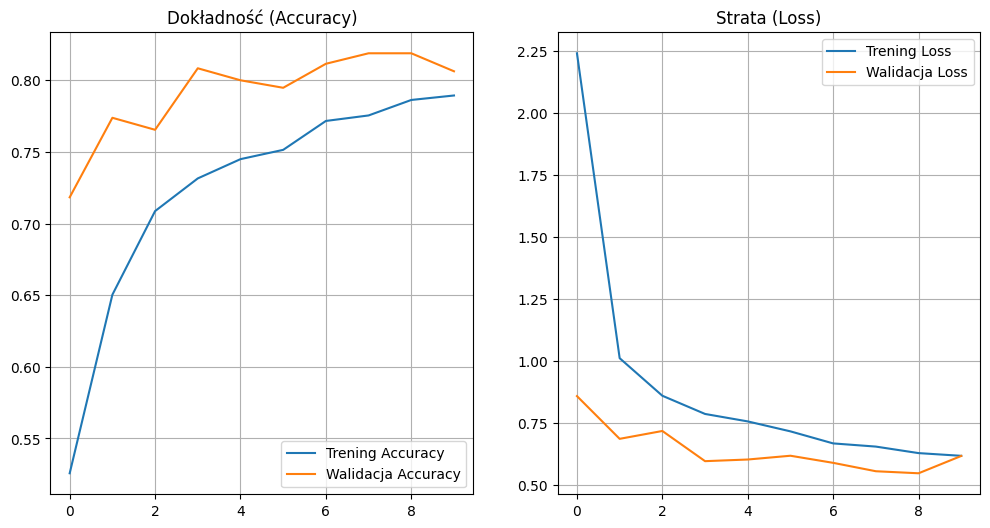

In [46]:
plot_training_history(history1)

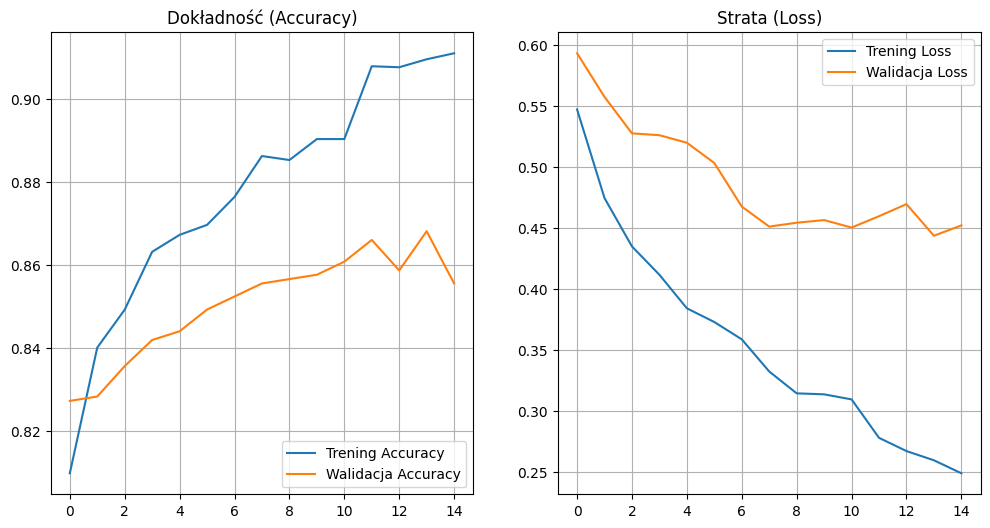

In [47]:
plot_training_history(history2)